### Code untuk di Jupyter notebook

In [1]:
%cd D:\SEMESTER 7\Pembelajaran Mesin\Dataset\process image-3 [70 30]

D:\SEMESTER 7\Pembelajaran Mesin\Dataset\process image-3 [70 30]


In [2]:
%ls

 Volume in drive D is Data
 Volume Serial Number is BC6D-4CE5

 Directory of D:\SEMESTER 7\Pembelajaran Mesin\Dataset\process image-3 [70 30]

13/12/2022  23:50    <DIR>          .
13/12/2022  23:50    <DIR>          ..
14/12/2022  00:41        19.046.272 model_K1S3.h5
14/12/2022  00:49        15.484.443 model_svm_K2S3.pkl
13/12/2021  14:33    <DIR>          testing
13/12/2021  14:33    <DIR>          training
               2 File(s)     34.530.715 bytes
               4 Dir(s)  517.686.501.376 bytes free


In [3]:
import os
# path di jupyter
base_dataset = 'D:/SEMESTER 7/Pembelajaran Mesin/Dataset/process image-3 [70 30]/'

In [4]:
# inisialisasi direktori data train dan validasi beserta data per kategori
dir1 = [r'D:/SEMESTER 7/Pembelajaran Mesin/Dataset/process image-3 [70 30]/training/acral melanoma/',
        r'D:/SEMESTER 7/Pembelajaran Mesin/Dataset/process image-3 [70 30]/testing/acral melanoma/',
        r'D:/SEMESTER 7/Pembelajaran Mesin/Dataset/process image-3 [70 30]/training/benign nevi/',
        r'D:/SEMESTER 7/Pembelajaran Mesin/Dataset/process image-3 [70 30]/testing/benign nevi/']

# CNN Feature Extraction

In [5]:
%matplotlib inline
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten, Dropout 
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from PIL import Image

import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time
import os

In [6]:
def preprocess(img,input_size):
    nimg = img.convert('RGB').resize(input_size)
    img_arr = (np.array(nimg))
    return img_arr

def reshape(imgs_arr):
    return np.stack(imgs_arr, axis=0)

def get_imlist(path):
    return [os.path.join(path,f) for f in os.listdir(path) if f.endswith('.jpg') or f.endswith('.jpeg') or f.endswith('.JPG') or f.endswith('.JPEG')]

def preprocess_norm(img_path):
    im = Image.open(img_path)
    X = preprocess(im,(224,224))
    X = reshape([X])
    info = np.iinfo(X.dtype) # Get the information of the incoming image type
    data = X.astype(np.float32) / info.max # normalize the data to 0 - 1
    return data

In [7]:
from keras.models import load_model
loaded_model = load_model('model_K1S3.h5')
model = Model(inputs=loaded_model.input, outputs=loaded_model.layers[-2].output)

In [8]:
feats_test = []
names_test = []
dir_test = [dir1[1], dir1[3]]
for direktori in dir_test:
    img_list = get_imlist(direktori)
    for i, img_path in enumerate(img_list):
        data = preprocess_norm(img_path)
        norm_feat = model.predict(data)
        img_name = os.path.split(img_path)[1]
        feats_test.append(norm_feat)
        if 'AM' in img_name:
            names_test.append('acral melanoma')
        else:
            names_test.append('benign nevi')
        print("extracting feature from image No. %d , %d images in total" %((i+1), len(img_list)))
        

feats_test = np.array(feats_test)
names_test = np.array(names_test)

extracting feature from image No. 1 , 105 images in total
extracting feature from image No. 2 , 105 images in total
extracting feature from image No. 3 , 105 images in total
extracting feature from image No. 4 , 105 images in total
extracting feature from image No. 5 , 105 images in total
extracting feature from image No. 6 , 105 images in total
extracting feature from image No. 7 , 105 images in total
extracting feature from image No. 8 , 105 images in total
extracting feature from image No. 9 , 105 images in total
extracting feature from image No. 10 , 105 images in total
extracting feature from image No. 11 , 105 images in total
extracting feature from image No. 12 , 105 images in total
extracting feature from image No. 13 , 105 images in total
extracting feature from image No. 14 , 105 images in total
extracting feature from image No. 15 , 105 images in total
extracting feature from image No. 16 , 105 images in total
extracting feature from image No. 17 , 105 images in total
extrac

extracting feature from image No. 37 , 112 images in total
extracting feature from image No. 38 , 112 images in total
extracting feature from image No. 39 , 112 images in total
extracting feature from image No. 40 , 112 images in total
extracting feature from image No. 41 , 112 images in total
extracting feature from image No. 42 , 112 images in total
extracting feature from image No. 43 , 112 images in total
extracting feature from image No. 44 , 112 images in total
extracting feature from image No. 45 , 112 images in total
extracting feature from image No. 46 , 112 images in total
extracting feature from image No. 47 , 112 images in total
extracting feature from image No. 48 , 112 images in total
extracting feature from image No. 49 , 112 images in total
extracting feature from image No. 50 , 112 images in total
extracting feature from image No. 51 , 112 images in total
extracting feature from image No. 52 , 112 images in total
extracting feature from image No. 53 , 112 images in tot

In [9]:
feats_test.shape

(217, 1, 12800)

In [10]:
reshaped_feats_test = feats_test.reshape(feats_test.shape[0],feats_test.shape[2])
reshaped_feats_test.shape

(217, 12800)

In [11]:
reshaped_feats_test.shape

(217, 12800)

In [12]:
from sklearn.preprocessing import LabelEncoder

x_test= reshaped_feats_test

lb = LabelEncoder()
y_test = lb.fit_transform(names_test)

## Load SVM Model untuk Predict X_test

In [13]:
import pickle

# Load the model from the file
with open("model_svm_K2S3.pkl", "rb") as f:
    svm_model = pickle.load(f)

In [14]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_testSVM = svm_model.predict(x_test)

y_pred = (y_testSVM > 0.5).astype(int)
target_names = ['acral melanoma', 'benign nevi']
print(classification_report(y_test, y_pred, target_names=target_names))

print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
print('acc score : ', svm_model.score(x_test,y_test))

                precision    recall  f1-score   support

acral melanoma       0.85      0.81      0.83       105
   benign nevi       0.83      0.87      0.85       112

      accuracy                           0.84       217
     macro avg       0.84      0.84      0.84       217
  weighted avg       0.84      0.84      0.84       217

Confusion Matrix
[[85 20]
 [15 97]]
acc score :  0.8387096774193549


C:\Users\Fadhlan\Anaconda3\envs\tf2.6\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


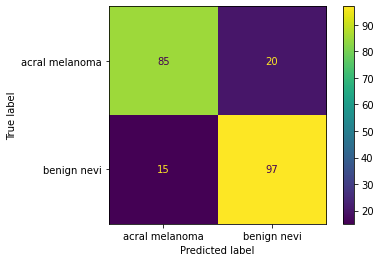

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(svm_model, x_test, y_test, display_labels=target_names)  
plt.savefig('D:/SEMESTER 7/Pembelajaran Mesin/Gambar Hasil/cm-skenario-3.svg')
plt.show()

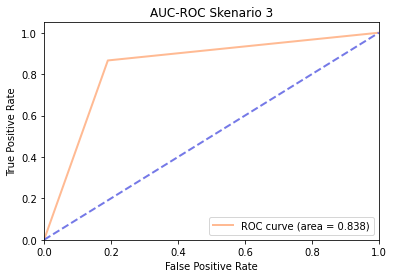

In [16]:
from sklearn.metrics import  precision_recall_curve, auc, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='#ffba93',
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='#7579e7', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Skenario 3')
plt.legend(loc="lower right")
plt.savefig('D:/SEMESTER 7/Pembelajaran Mesin/Gambar Hasil/auc-roc-skenario-3.svg')
plt.show()

In [18]:
svm_model.best_params_

{'C': 1000, 'gamma': 1e-05, 'kernel': 'rbf'}